In [217]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [385]:
a_1 = -1.1693673371945799
b_1 = 51.41919388017123
c_1 = 5.954712391658841
d_1 = 1.0045788520232413
params = [a_1, b_1, c_1, d_1]
data = [a_1, b_1, c_1, d_1]
h = .01
step_size = h
tolerance = .1



In [371]:
def next_erk(step_size, her2, akt, erk, k_1, k_2, deg_1):
    K1 = k_1 * her2 - k_2 * akt * erk - deg_1 * erk
    K2 = k_1 * her2 - k_2 * akt * (erk + K1) - deg_1 * (erk + K1)
    return erk + step_size*((K1+K2)/2)

def next_akt(step_size, her2, akt, k_3, deg_2):
    K1 = k_3 * her2 - deg_2 * akt
    K2 = k_3 * her2 - deg_2 * (akt + K1)
    return akt + step_size*((K1+K2)/2)


def next_il1(step_size, erk, p_nfkb, il1, k_4, k_5, deg_3):
    K1 = k_4 * erk + k_5 * p_nfkb - deg_3 * il1
    K2 = k_4 * erk + k_5 * p_nfkb - deg_3 * (il1 + K1)
    return il1 + step_size*((K1+K2)/2)


def next_ikk(step_size, akt, il1, ikk, k_6, k_7, deg_4):
    K1 = k_6 * akt + k_7 * il1 - deg_4 * ikk
    K2 = k_6 * akt + k_7 * il1 - deg_4 * (ikk + K1)
    return ikk + step_size*((K1+K2)/2)


def next_ikb_nfkb(step_size, ikk, ikb_nfkb, ikb, p_nfkb, k_8, k_9):
    K1 = -1 * k_8 * ikk * ikb_nfkb + k_9 * ikb * p_nfkb
    K2 = -1 * k_8 * ikk * (ikb_nfkb + K1) + k_9 * ikb * p_nfkb
    return ikb_nfkb + step_size*((K1+K2)/2)


def next_p_ikb(step_size, ikk, ikb_nfkb, p_ikb, k_8, deg_5):
    K1 = k_8 * ikk * ikb_nfkb - deg_5 * p_ikb
    K2 = k_8 * ikk * ikb_nfkb - deg_5 * (p_ikb + K1)
    return p_ikb + step_size*((K1+K2)/2)


def next_p_nfkb(step_size, ikk, ikb_nfkb, ikb, p_nfkb, k_8, k_9):
    K1 = k_8 * ikk * ikb_nfkb - k_9 * ikb * p_nfkb
    K2 = k_8 * ikk * ikb_nfkb - k_9 * ikb * (p_nfkb + K1)
    return p_nfkb + step_size*((K1+K2)/2)


def next_ikb(step_size, p_nfkb, ikb, k_9, k_10):
    K1 = k_10 * p_nfkb - k_9 * ikb * p_nfkb
    K2 = k_10 * p_nfkb - k_9 * (ikb + K1) * p_nfkb
    return ikb + step_size*((K1+K2)/2)



In [398]:
def RK2(step_size, t_start, t_end, start_values, k_values, deg_values):
    steps = int((t_end - t_start) / step_size)

    stored_erk = [start_values[1]]
    stored_akt = [start_values[2]]
    stored_il1 = [start_values[3]]
    stored_ikk = [start_values[4]]
    stored_ikb_nfkb = [start_values[5]]
    stored_p_ikb = [start_values[6]]
    stored_p_nfkb = [start_values[7]]
    stored_ikb = [start_values[8]]

    for i in range(steps):
        stored_erk.append(next_erk(step_size, start_values[0], stored_akt[i], stored_erk[i], k_values[0], k_values[1], deg_values[0]))
        stored_akt.append(next_akt(step_size, start_values[0], stored_akt[i], k_values[2], deg_values[1]))
        stored_il1.append(next_il1(step_size, stored_erk[i], stored_p_nfkb[i], stored_il1[i], k_values[3], k_values[4], deg_values[2]))
        stored_ikk.append(next_ikk(step_size, stored_akt[i], stored_il1[i], stored_ikk[i], k_values[5], k_values[6], deg_values[3]))
        stored_ikb_nfkb.append(next_ikb_nfkb(step_size, stored_ikk[i], stored_ikb_nfkb[i], stored_ikb[i], stored_p_nfkb[i], k_values[7], k_values[8]))
        stored_p_ikb.append(next_p_ikb(step_size, stored_ikk[i], stored_ikb_nfkb[i], stored_p_ikb[i], k_values[7], deg_values[0]))
        stored_p_nfkb.append(next_p_nfkb(step_size, stored_ikk[i], stored_ikb_nfkb[i], stored_ikb[i], stored_p_nfkb[i], k_values[7], k_values[8]))
        stored_ikb.append(next_ikb(step_size, stored_p_nfkb[i], stored_ikb[i], k_values[8], k_values[9]))
       # stored_total.append(next_ikb_nfkb(step_size, stored_ikk[i], stored_ikb_nfkb[i], stored_ikb[i], stored_p_nfkb[i], k_values[7], k_values[8]) + next_p_ikb(step_size, stored_ikk[i], stored_ikb_nfkb[i], stored_p_ikb[i], k_values[7], deg_values[0])+next_ikb(step_size, stored_p_nfkb[i], stored_ikb[i], k_values[8], k_values[9]))
    return stored_p_nfkb


def actual(data, step_size):
    a = data[0]
    b = data[1]
    c = data[2]
    d = data[3]
    t = 0
    p_actual = [a*np.exp(-b*np.exp(-c*t))+d]
    while t < 1:
        t += step_size
        p_actual.append(a*np.exp(-b*np.exp(-c*t))+d)
    return p_actual

def E2(step_size, t_start, t_end, start_vals, k_vals, deg_vals):
    RK2_approx = RK2(step_size, 0 ,1, start_vals, k_vals, deg_vals)
    x_actual = actual(data, step_size)
    print(len(x_actual), len(RK2_approx))
    max_error = 0
    for i in range(len(RK2_approx)):
        max_error = max(max_error, abs(RK2_approx[i]-x_actual[i]))
    return max_error

def order(step_size, t_start, t_end, start_vals, k_vals, deg_vals):
    #print(f"h is {h}")
    h = step_size
    h_new = float(h/2) #h_new is the new step-size, which is 1/2 of the original
    print(f"h/2 is {h_new}")
    e2 = E2(h_new, 0,1,start_vals, k_vals, deg_vals) #Calculates the new error based on the new step-size
    print(f"The max error, e2, with {h_new} is {e2}")
    e1 = E2(h, 0 ,1 , start_vals, k_vals, deg_vals)  #Calculates the old error based on the orignal step-size
    print(f"The max error, e1, with {h} is {e1}")
    ratio = float(e2/e1)
    print(f"ratio of the error is {ratio}")
    n = math.log2(abs(ratio))  #Calculates the order, n
    return -n

def main(h):
    # randomize these start values
    iter = 0
    while True:
        iter +=1
        her2_start = random.uniform(0,.5)
        erk_start = random.uniform(0,1)
        akt_start = random.uniform(0,1)
        il1_start = random.uniform(0,1)
        ikk_start = random.uniform(0,1)
        ikb_nfkb_start = random.uniform(0,1)
        p_ikb_start = random.uniform(0,1)
        p_nfkb_start = 1
        ikb_start = random.uniform(0,1)

        start_values = [her2_start, erk_start, akt_start, il1_start, ikk_start, ikb_nfkb_start, p_ikb_start, p_nfkb_start, ikb_start]
        #                 0,         1            2           3              4        5         6                 7            8
        k_1 = random.uniform(0,5)
        k_2 = random.uniform(0,5)
        k_3 = random.uniform(0,5)
        k_4 = random.uniform(0,5)
        k_5 = random.uniform(0,5)
        k_6 = random.uniform(0,10)
        k_7 = random.uniform(0,10)
        k_8 = random.uniform(0,5)
        k_9 = random.uniform(0,5)
        k_10 = random.uniform(0,15)
        k_values = [k_1, k_2, k_3, k_4, k_5, k_6, k_7, k_8, k_9, k_10]

        deg_1 = random.uniform(0,5)
        deg_2 = random.uniform(0,5)
        deg_3 = random.uniform(0,5)
        deg_4 = random.uniform(0,5)
        deg_5 = random.uniform(0,10)
        deg_values = [deg_1, deg_2, deg_3, deg_4, deg_5]


        da_list = RK2(h, 0, 1, start_values, k_values, deg_values)
        p_nfkb_actual = actual(data = params, step_size = h)
        t_vals = np.linspace(0,1,int((1/h) + 1))
        # print(start_values)
        # print(k_values)
        # print(deg_values)
        # print(da_list)
        if iter % 10000 == 0: 
            print(iter)
        #if abs(da_list[1000] - p_nfkb_actual[1000]) < .01 and abs(da_list[500] - p_nfkb_actual[500]) < .01:
        #    graphData(t_vals, p_nfkb_actual, da_list)
        #    print("Start Values", start_values)
        #    print("K vals", k_values)
        #    print("Deg vals", deg_values)
        #    break

        difference = []
        for i in range(len(da_list)):
            difference.append(abs(da_list[i] - p_nfkb_actual[i]))
        max_dif = max(difference)
        if max_dif < tolerance:
            graphData(t_vals, p_nfkb_actual, da_list)
            print("Start Values", start_values)
            print("K vals", k_values)
            print("Deg vals", deg_values)

            print("For max error")
            h=0.01#play around with the step size. seems ~0.0186 is good
            print(f"Order with h = {h} and h/2 = {h/2} is: {order(h,0,1,start_vals, k_vals, deg_vals)}")
            h=h/2
            print(f"Order with h = {h} and h/2 = {h/2} is: {order(h,0,1,start_vals, k_vals, deg_vals)}")
            h=h/2
            print(f"Order with h = {h} and h/2 = {h/2} is: {order(h,0,1, start_vals, k_vals, deg_vals)}")
            h=h/2
            print(f"Order with h = {h} and h/2 = {h/2} is: {order(h, 0,1, start_vals, k_vals, deg_vals)}")
            
            break
        

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000


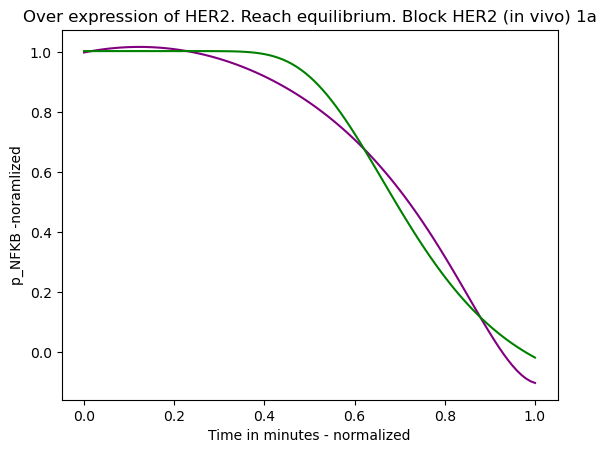

Start Values [0.07547612043992324, 0.9125206031477493, 0.013315882258116307, 0.5797132816410988, 0.26913557488884765, 0.9989322428807843, 0.9053155558515564, 1, 0.17362732978841178]
K vals [0.4101510751145432, 0.07217915835927347, 2.2567720337136987, 0.7871804065028659, 3.412815788373773, 5.567908254712679, 4.31798204349442, 1.185020550148896, 0.15319259794493278, 8.030042425654951]
Deg vals [3.523351099933061, 4.560910148100223, 1.24491707588603, 3.0059674353245756, 7.6648824830960125]
For max error
h/2 is 0.005
201 201
The max error, e2, with 0.005 is inf
101 101
The max error, e1, with 0.01 is inf
ratio of the error is nan
Order with h = 0.01 and h/2 = 0.005 is: nan
h/2 is 0.0025
402 401
The max error, e2, with 0.0025 is inf
201 201
The max error, e1, with 0.005 is inf
ratio of the error is nan
Order with h = 0.005 and h/2 = 0.0025 is: nan
h/2 is 0.00125
802 801
The max error, e2, with 0.00125 is inf
402 401
The max error, e1, with 0.0025 is inf
ratio of the error is nan
Order with 

C:\Users\jaked\AppData\Local\Temp\ipykernel_22480\2745474477.py:56: RuntimeWarning: invalid value encountered in scalar divide
  ratio = float(e2/e1)


In [401]:
main(h)

In [404]:
x_test = RK2(.01, 0, 1, start_vals, k_vals, deg_vals)
x_test

[0.99,
 0.991439238188295,
 0.9927756932059649,
 0.9940122601412538,
 0.9951517986558341,
 0.9961970608019027,
 0.9971506281171227,
 0.9980148566001524,
 0.9987918281576816,
 0.9994833071320433,
 1.0000907005551776,
 1.0006150208206193,
 1.0010568495127037,
 1.0014163011753692,
 1.0016929858371408,
 1.0018859691305622,
 1.0019937288508103,
 1.0020141067874466,
 1.0019442546336685,
 1.0017805727278453,
 1.0015186403115541,
 1.0011531358960046,
 1.0006777462139376,
 1.0000850620962383,
 0.9993664594510934,
 0.9985119633382055,
 0.9975100929211438,
 0.9963476848474381,
 0.9950096923488924,
 0.9934789570746624,
 0.9917359503682911,
 0.9897584803791979,
 0.9875213610619082,
 0.984996038766268,
 0.9821501717635674,
 0.9789471576922338,
 0.9753456035484713,
 0.9712987324980309,
 0.9667537214507426,
 0.9616509630235005,
 0.9559232452207704,
 0.949494841879534,
 0.9422805066442763,
 0.9341843629303448,
 0.9250986819549457,
 0.9149025403916949,
 0.9034603484279389,
 0.8906202378157145,
 0.876212